# Analysis of Nintendo Video Game Sales from 2010 - 2016

### Using R-Programming to Explore Video Game Sales Trend

# Table of Contents:
1. Project Details
2. Cleaning and Importing Data
3. Most Popular Genre throughout 2010-2016
4. Visualizing Trends in Genre Popularity from 2010 to 2016
5. Seeing Which Platform Has The Highest Sales Potential
6. Conclusions

# Project Details:

![publishers-2.jpg](attachment:0b39a079-4d01-44dc-a020-85b6c0cdb9a6.jpg)


Data source: Video Game Sales (author gregorysmith) [link](https://www.kaggle.com/datasets/gregorut/videogamesales)

### Data Fields

* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

### Project goal:
**Specifically look at Nintendo video game sales over 2010-2016 and discover popularity trends.** 

I chose to look at Nintendo specifically because of the the preliminary Tableau visualization of the whole raw data showing that **Nintendo had the highest total sum of sales** compared to other video game publishers. [link](https://public.tableau.com/app/profile/johnny.sin8014/viz/VideoGameSales_16671577308120/Dashboard1)

#### *Loading Packages*

In [1]:
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(dplyr)
library(janitor)
library(skimr)
library(lubridate)
library(repr)
library(plotly)
library(gridExtra)
library(grid)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config



Attaching package: ‘gridExtra’


The following object is 

# Cleaning and Importing Data
### Import Cleaned Data Using SQL Querying
#### SQL query - details
   * **SELECT** *
   * **FROM** datatable
   * **WHERE** Publisher = Nintendo **AND** Year **BETWEEN** '2010' **AND** '2016'
   * **ORDER BY** Year **DESC**

In [2]:
data_raw <- read.csv(file = '../input/vgcleaned-sql/bquxjob_2306c54f_18420753741.csv')
str(data_raw)

'data.frame':	170 obs. of  11 variables:
 $ Rank        : int  2214 12956 14971 11012 14304 4263 4660 5290 2450 6590 ...
 $ Name        : chr  "The Legend of Zelda: Twilight Princess HD" "Culdcept Revolt" "Teddy Together" "Disney Art Academy" ...
 $ Platform    : chr  "WiiU" "3DS" "3DS" "3DS" ...
 $ Year        : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Genre       : chr  "Action" "Strategy" "Simulation" "Action" ...
 $ Publisher   : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales    : num  0.48 0 0 0.01 0.02 0.04 0.16 0.16 0.26 0.03 ...
 $ EU_Sales    : num  0.3 0 0.02 0.01 0.01 0.16 0.12 0.1 0.1 0.11 ...
 $ JP_Sales    : num  0.08 0.05 0 0.07 0.01 0.24 0.11 0.07 0.44 0.1 ...
 $ Other_Sales : num  0.08 0 0 0 0 0.01 0.03 0.03 0.04 0.01 ...
 $ Global_Sales: num  0.94 0.05 0.02 0.09 0.03 0.46 0.42 0.35 0.85 0.26 ...


# Most Popular Genre throughout 2010-2016
Created a new data table with the total sales per genre per region to look at which genre maintained the highest popularity.

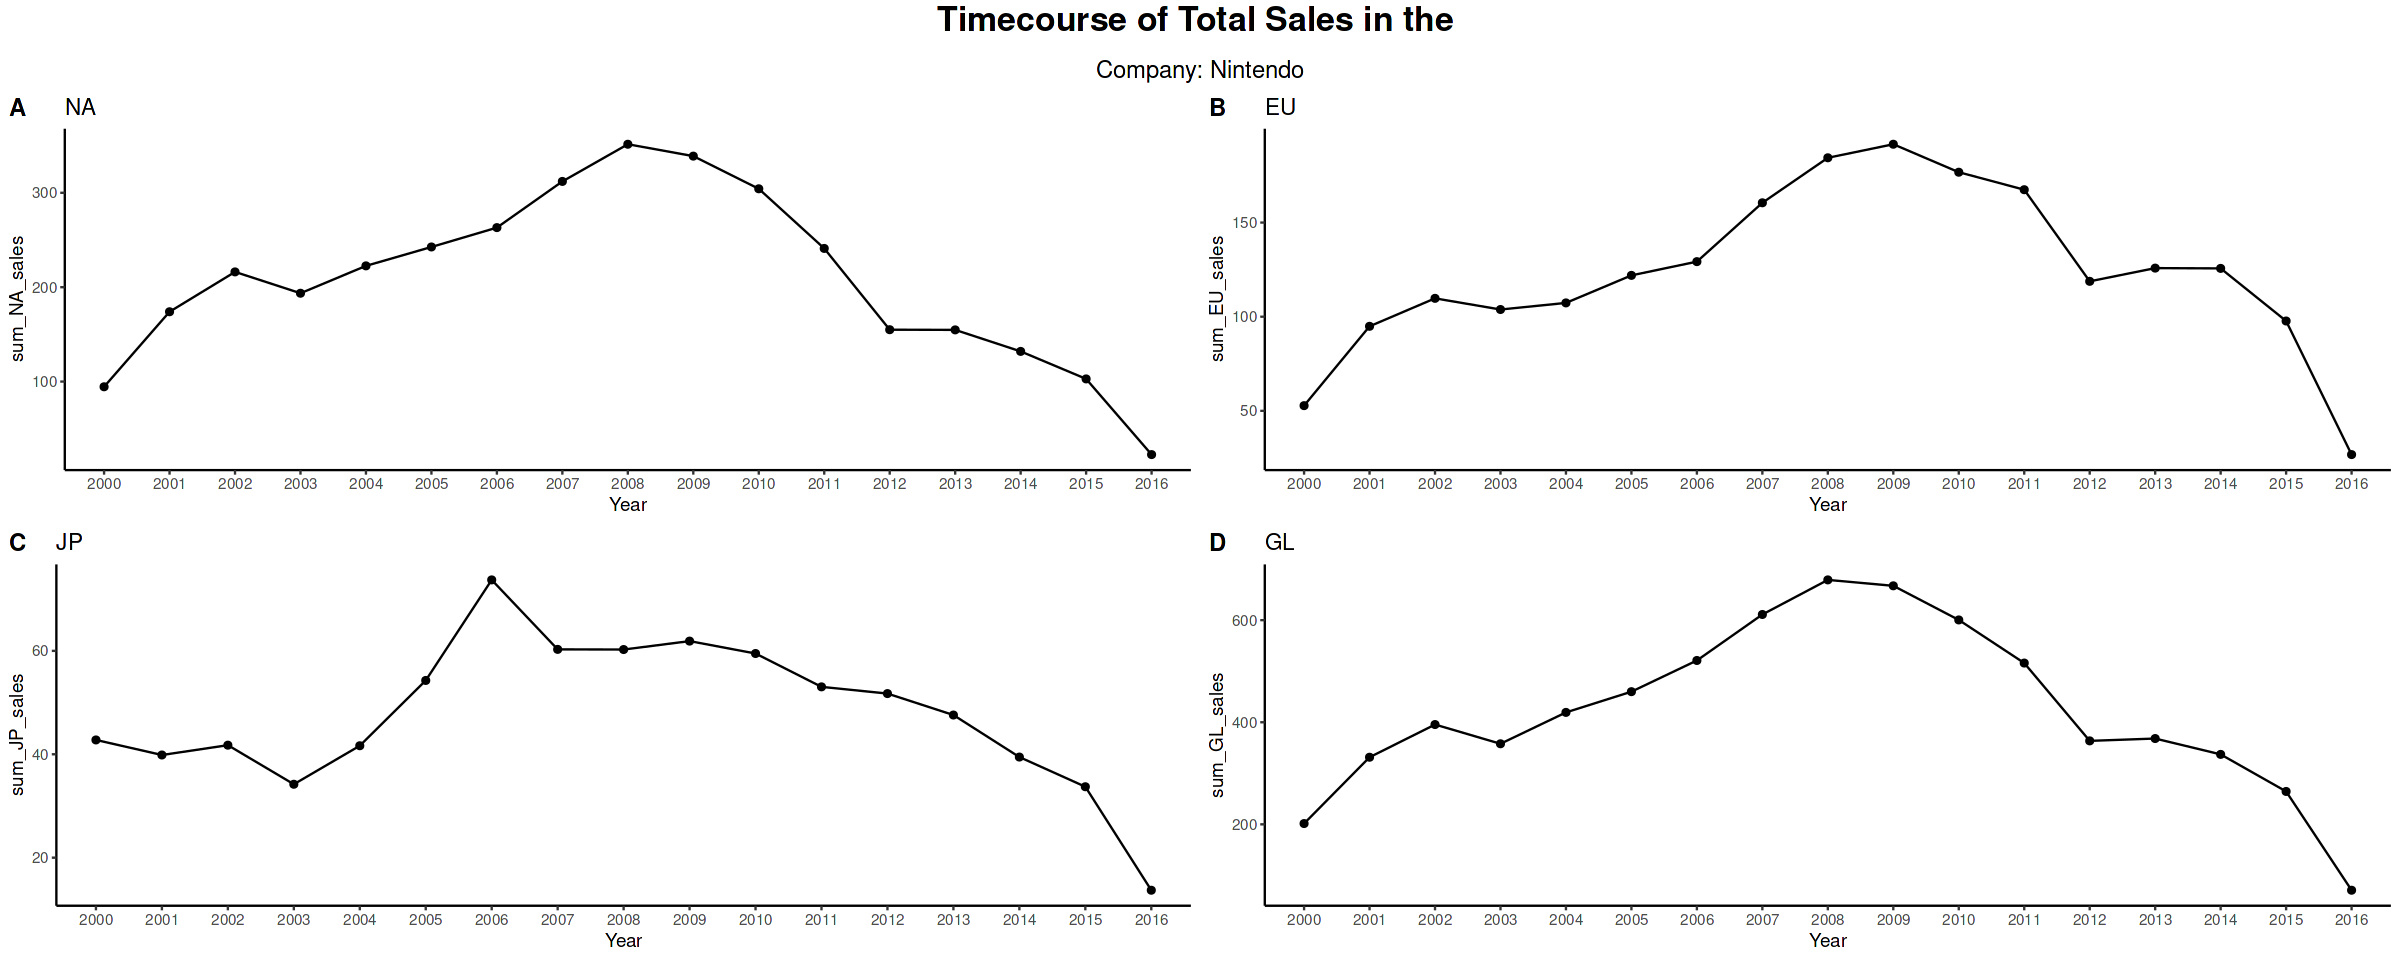

In [3]:
set_plot_dimensions <- function(width_choice, height_choice) {
options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}
set_plot_dimensions(20,8)

data_original <- read.csv(file = '../input/videogamesales/vgsales.csv')
sales_by_year <- data_original %>% filter(Year >= '2000'& Year <= '2016') %>% group_by(Year) %>% summarise(sum_NA_sales = sum(NA_Sales, na.rm = TRUE), sum_EU_sales = sum(EU_Sales, na.rm = TRUE), sum_JP_sales = sum(JP_Sales, na.rm = TRUE), sum_GL_sales = sum(Global_Sales, na.rm = TRUE))

plot0a <- sales_by_year %>% ggplot(mapping = aes(x = Year, y= sum_NA_sales)) + geom_point() + geom_line(group=1) + labs(title = 'NA') + theme_classic()
plot0b <- sales_by_year %>% ggplot(mapping = aes(x = Year, y= sum_EU_sales)) + geom_point() + geom_line(group=1) + labs(title = 'EU') + theme_classic()
plot0d <- sales_by_year %>% ggplot(mapping = aes(x = Year, y= sum_GL_sales)) + geom_point() + geom_line(group=1) + labs(title = 'GL') + theme_classic()
plot0c <- sales_by_year %>% ggplot(mapping = aes(x = Year, y= sum_JP_sales)) + geom_point() + geom_line(group=1) + labs(title = 'JP') + theme_classic()

plot0all <- ggarrange(plot0a, plot0b, plot0c,plot0d,
         ncol = 2, nrow = 2,
         widths = 1, labels = c('A', 'B', 'C', 'D'))
title0 <-  expression(atop(bold("Timecourse of Total Sales in the "), scriptstyle("Company: Nintendo")))
annotate_figure(plot0all, top = text_grob(title0, size =20))

Region,Most popular Genre
<chr>,<chr>
NA,Platform
EU,Role-Playing
JP,Role-Playing


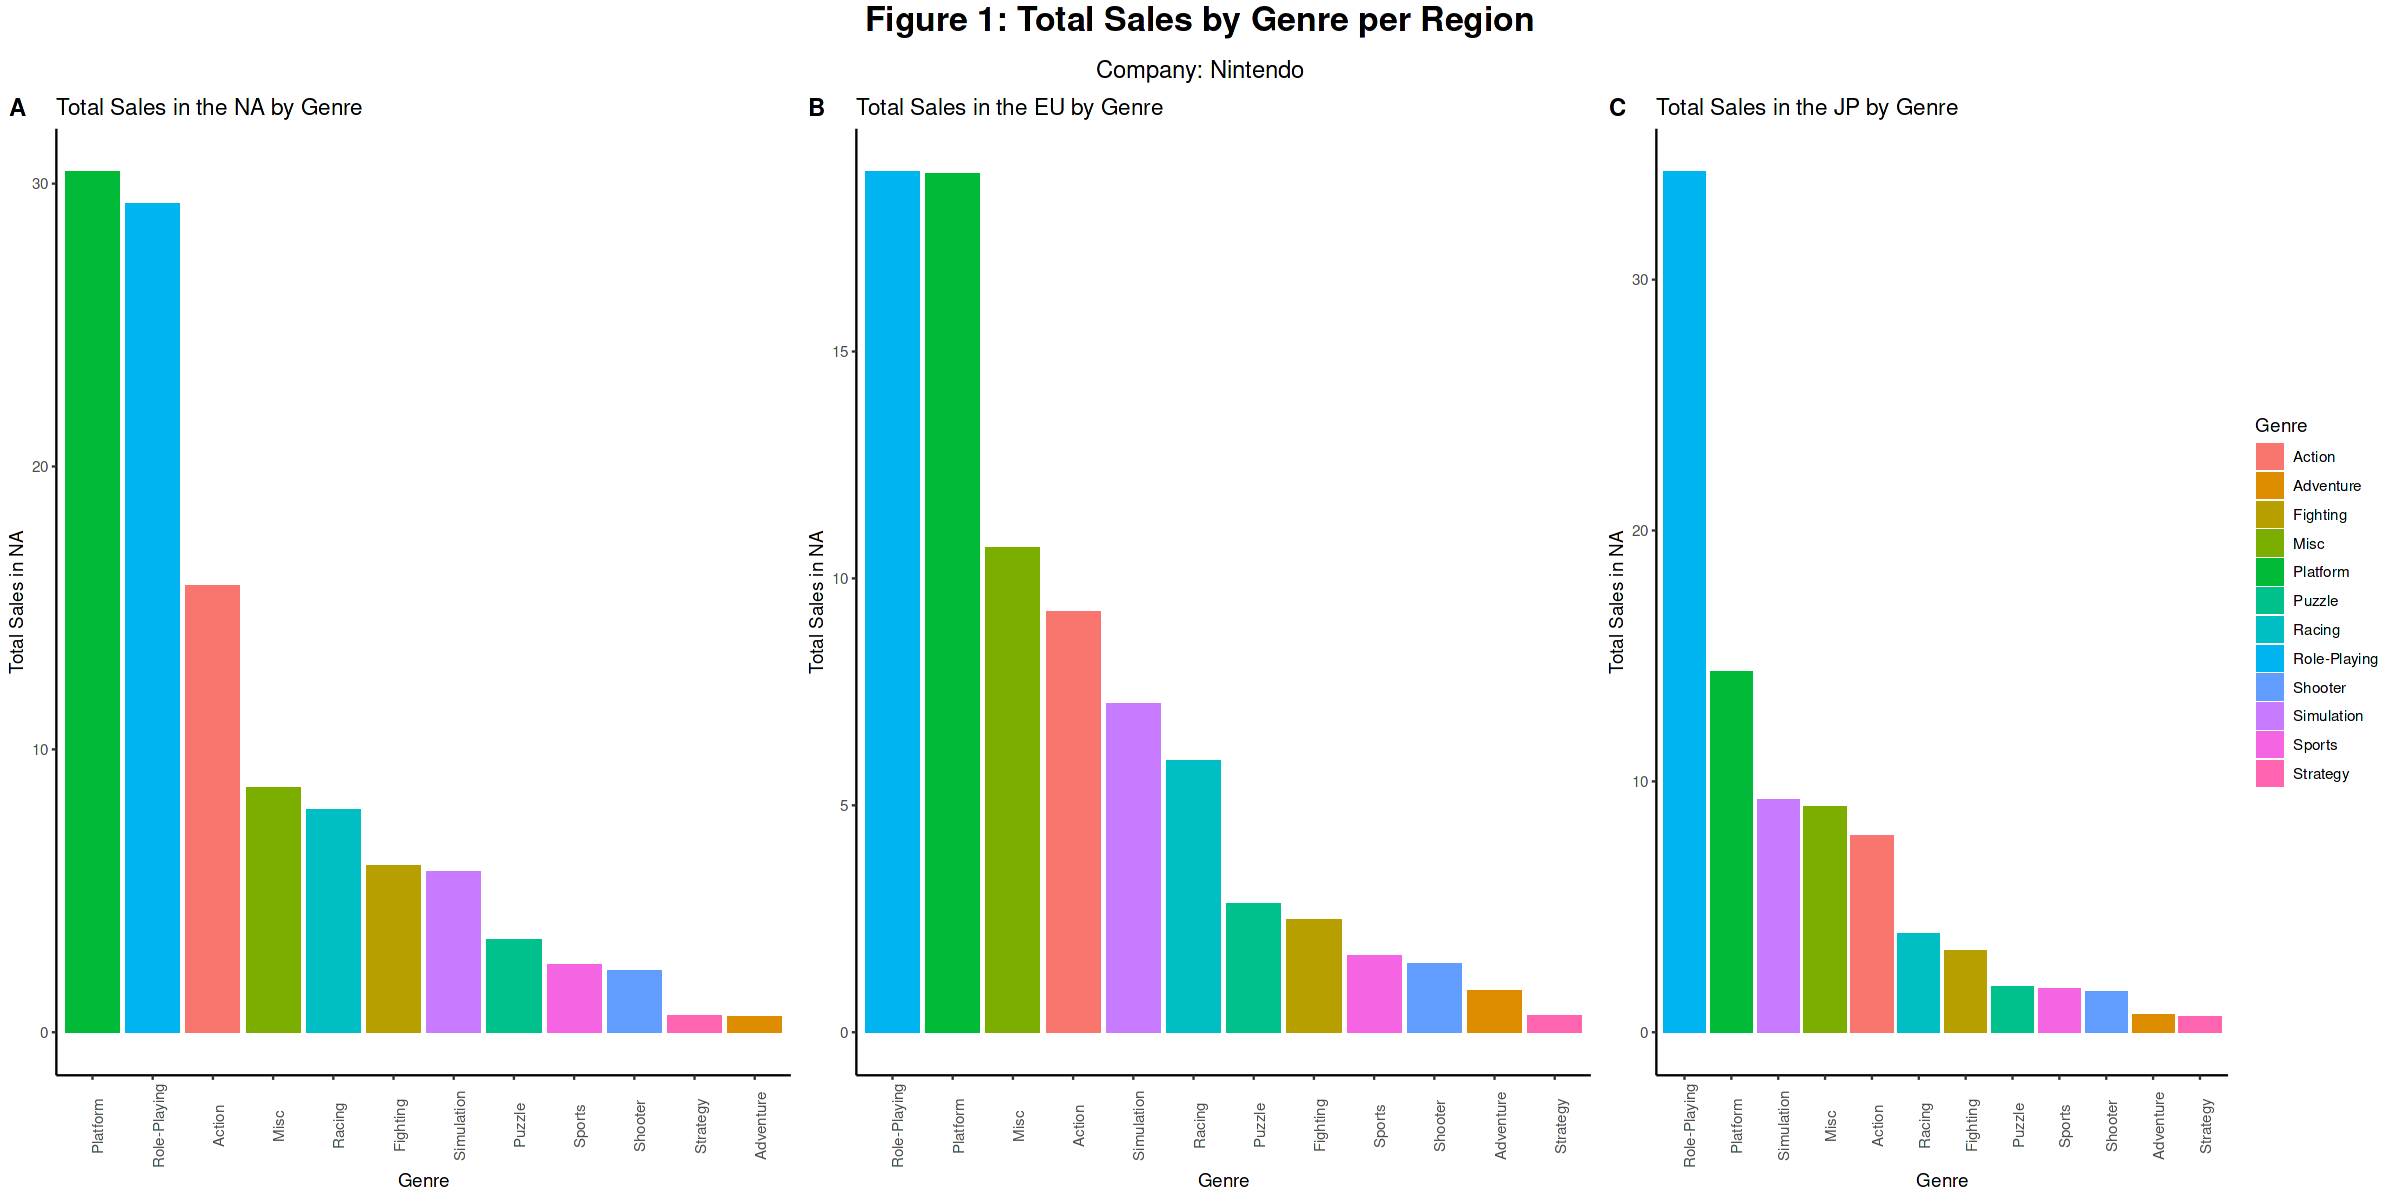

In [4]:
set_plot_dimensions <- function(width_choice, height_choice) {
options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}
set_plot_dimensions(20,10)

sales_by_genre <- data_raw %>% group_by(Genre) %>% summarise(sum_NA_sales = sum(NA_Sales, na.rm = TRUE), sum_EU_sales = sum(EU_Sales, na.rm = TRUE), sum_JP_sales = sum(JP_Sales, na.rm = TRUE), sum_GL_sales = sum(Global_Sales, na.rm = TRUE))

# multi-plot bar graph looking at the popularity of each genre
plot1a <- sales_by_genre %>% ggplot(mapping = aes(x = reorder(Genre, -sum_NA_sales) , y =sum_NA_sales, fill = Genre)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Genre') + labs(title = 'Total Sales in the NA by Genre') + theme_classic() + theme(legend.position='none', axis.text.x = element_text(angle = 90))
plot1b <- sales_by_genre %>% ggplot(mapping = aes(x = reorder(Genre, -sum_EU_sales), y =sum_EU_sales, fill = Genre)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Genre') + labs(title = 'Total Sales in the EU by Genre') + theme_classic()  + theme(legend.position='none', axis.text.x = element_text(angle = 90))
plot1c <- sales_by_genre %>% ggplot(mapping = aes(x = reorder(Genre, -sum_JP_sales), y =sum_JP_sales, fill = Genre)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Genre') + labs(title = 'Total Sales in the JP by Genre') + theme_classic() + theme(axis.text.x = element_text(angle = 90))

plot1all <- ggarrange(plot1a, plot1b, plot1c,
         ncol = 3, nrow = 1,
         widths = 1, labels = c('A', 'B', 'C'))
title <-  expression(atop(bold("Figure 1: Total Sales by Genre per Region"), scriptstyle("Company: Nintendo")))
annotate_figure(plot1all, top = text_grob(title, size =20))
NA_max <- max(sales_by_genre$sum_NA_sales)
EU_max <- max(sales_by_genre$sum_EU_sales)
JP_max <- max(sales_by_genre$sum_JP_sales)

# creating a summary table of popular genre by region
table_pop <- data.frame()
region_list <- c('NA', 'EU', 'JP')
pop_genre_list <- c(sales_by_genre$Genre[sales_by_genre$sum_NA_sales == NA_max], 
                    sales_by_genre$Genre[sales_by_genre$sum_EU_sales == EU_max], 
                    sales_by_genre$Genre[sales_by_genre$sum_JP_sales == JP_max])
table_pop <- data.frame(region_list, pop_genre_list)
colnames(table_pop) <- c('Region', 'Most popular Genre')
table_pop

From these graphs we see that the most popular genre for each of the regions for Nintendo was Platform in NA, while for EU and JP it was Role-Playing, between 2010-2016. 
Now lets see if the popularity of racing was maintained during that year range. 

# Visualizing Trends in Genre Popularity from 2010 to 2016

Plot ID,P-Value
<chr>,<dbl>
A,6.963144e-08
B,4.259015e-08
C,5.338917e-06
D,6.144287e-07
E,4.420641e-04
F,1.978028e-04


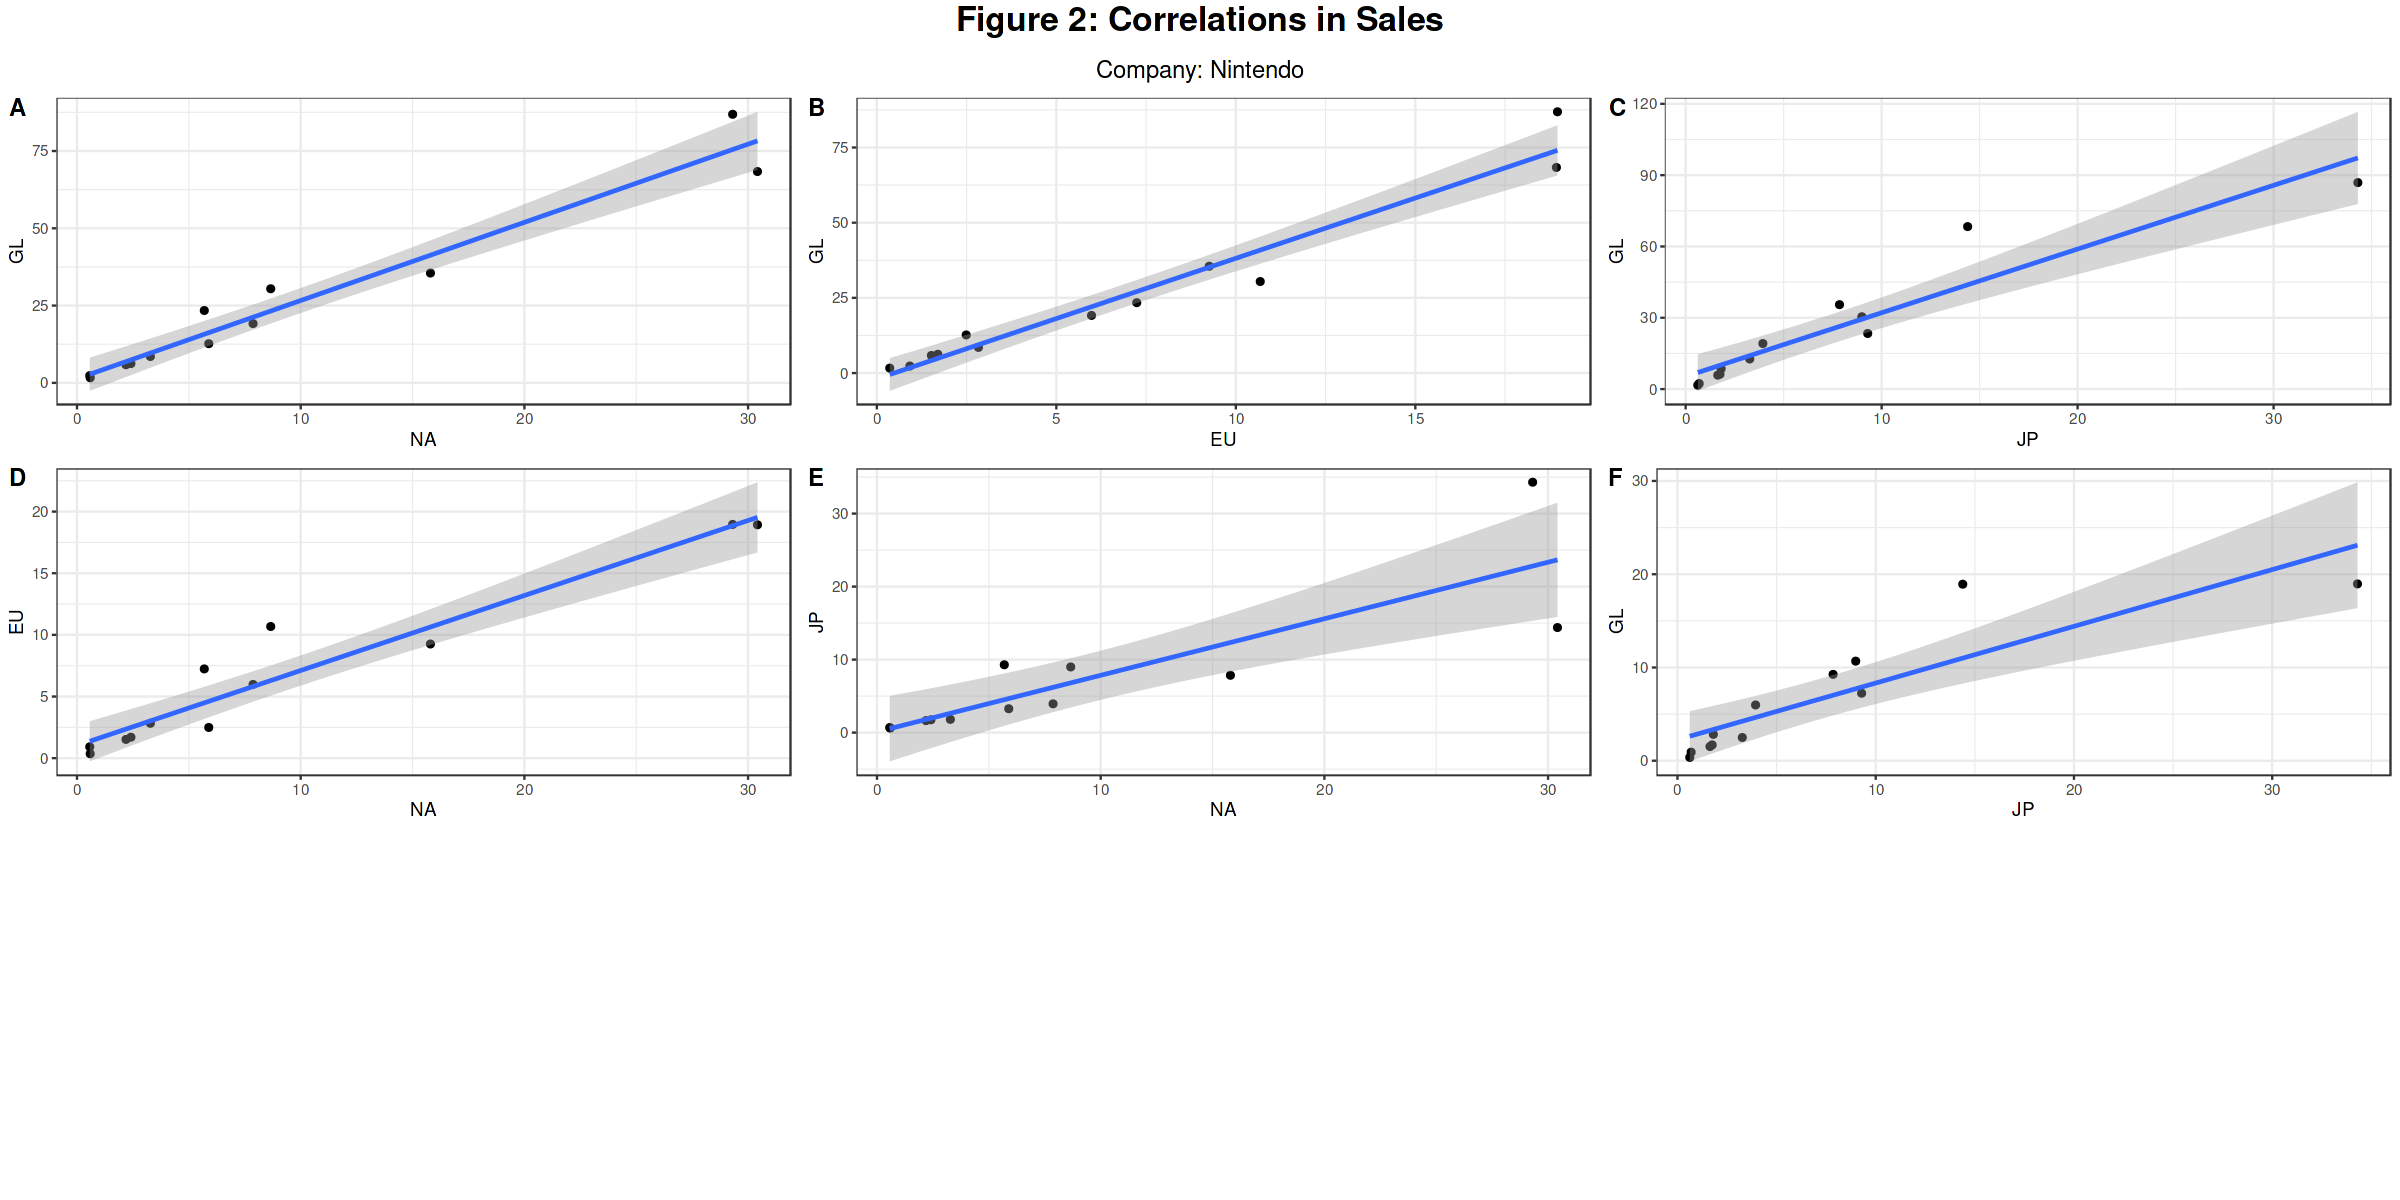

In [5]:
#setting up the dimensions for plot output
set_plot_dimensions <- function(width_choice, height_choice) {
options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}
set_plot_dimensions(20,10)

# main plot
plot2a <- sales_by_genre %>% ggplot(mapping = aes(x = sum_NA_sales, y = sum_GL_sales)) + geom_point() + geom_smooth(method = 'lm', formula = y~x) + xlab('NA') + ylab('GL') + theme_bw()
plot2b <- sales_by_genre %>% ggplot(mapping = aes(x = sum_EU_sales, y = sum_GL_sales)) + geom_point() + geom_smooth(method = 'lm', formula = y~x) + xlab('EU') + ylab('GL') + theme_bw()
plot2c <- sales_by_genre %>% ggplot(mapping = aes(x = sum_JP_sales, y = sum_GL_sales)) + geom_point() + geom_smooth(method = 'lm', formula = y~x) + xlab('JP') + ylab('GL') + theme_bw()
plot2d <- sales_by_genre %>% ggplot(mapping = aes(x = sum_NA_sales, y = sum_EU_sales)) + geom_point() + geom_smooth(method = 'lm', formula = y~x) + xlab('NA') + ylab('EU') + theme_bw()
plot2e <- sales_by_genre %>% ggplot(mapping = aes(x = sum_NA_sales, y = sum_JP_sales)) + geom_point() + geom_smooth(method = 'lm', formula = y~x) + xlab('NA') + ylab('JP') + theme_bw()
plot2f <- sales_by_genre %>% ggplot(mapping = aes(x = sum_JP_sales, y = sum_EU_sales)) + geom_point() + geom_smooth(method = 'lm', formula = y~x) + xlab('JP') + ylab('GL') + theme_bw()

plot2_all <- ggarrange(plot2a, plot2b, plot2c, plot2d, plot2e, plot2f,
          labels = c('A', 'B', 'C', 'D', 'E', 'F'),
         ncol = 3, nrow = 3)

title2 <-  expression(atop(bold("Figure 2: Correlations in Sales"), scriptstyle("Company: Nintendo")))
annotate_figure(plot2_all, top = text_grob(title2, size =20))

# correlation test 
cor_pvalue <- function(x,y, method = 'pearson'){
    cor_output <- cor.test(x = x,
                          y = y,
                          method = method)
    cor_output$p.value
}
f1 <- cor_pvalue(x = sales_by_genre$sum_NA_sales, y = sales_by_genre$sum_GL_sales)
f2 <- cor_pvalue(x = sales_by_genre$sum_EU_sales, y = sales_by_genre$sum_GL_sales)
f3 <- cor_pvalue(x = sales_by_genre$sum_JP_sales, y = sales_by_genre$sum_GL_sales)
f4 <- cor_pvalue(x = sales_by_genre$sum_NA_sales, y = sales_by_genre$sum_EU_sales)
f5 <- cor_pvalue(x = sales_by_genre$sum_NA_sales, y = sales_by_genre$sum_JP_sales)
f6 <- cor_pvalue(x = sales_by_genre$sum_JP_sales, y = sales_by_genre$sum_EU_sales)

# graphing the correlation p-value 
f_list1 <- c('A', 'B', 'C', 'D', 'E', 'F')
f_list <- c(f1, f2, f3, f4, f5, f6)
p_table <- data.frame(f_list1, f_list)
colnames(p_table) <- c('Plot ID', 'P-Value')
p_table

Here we see that globally and regionally the popularity seems to be very well correlated meaning, we can use a single region to predict the sales in a different region. Having this regional non-specificity will be beneficial for our marketing purposes.

# Seeing Which Platform Has The Highest Sales Potential

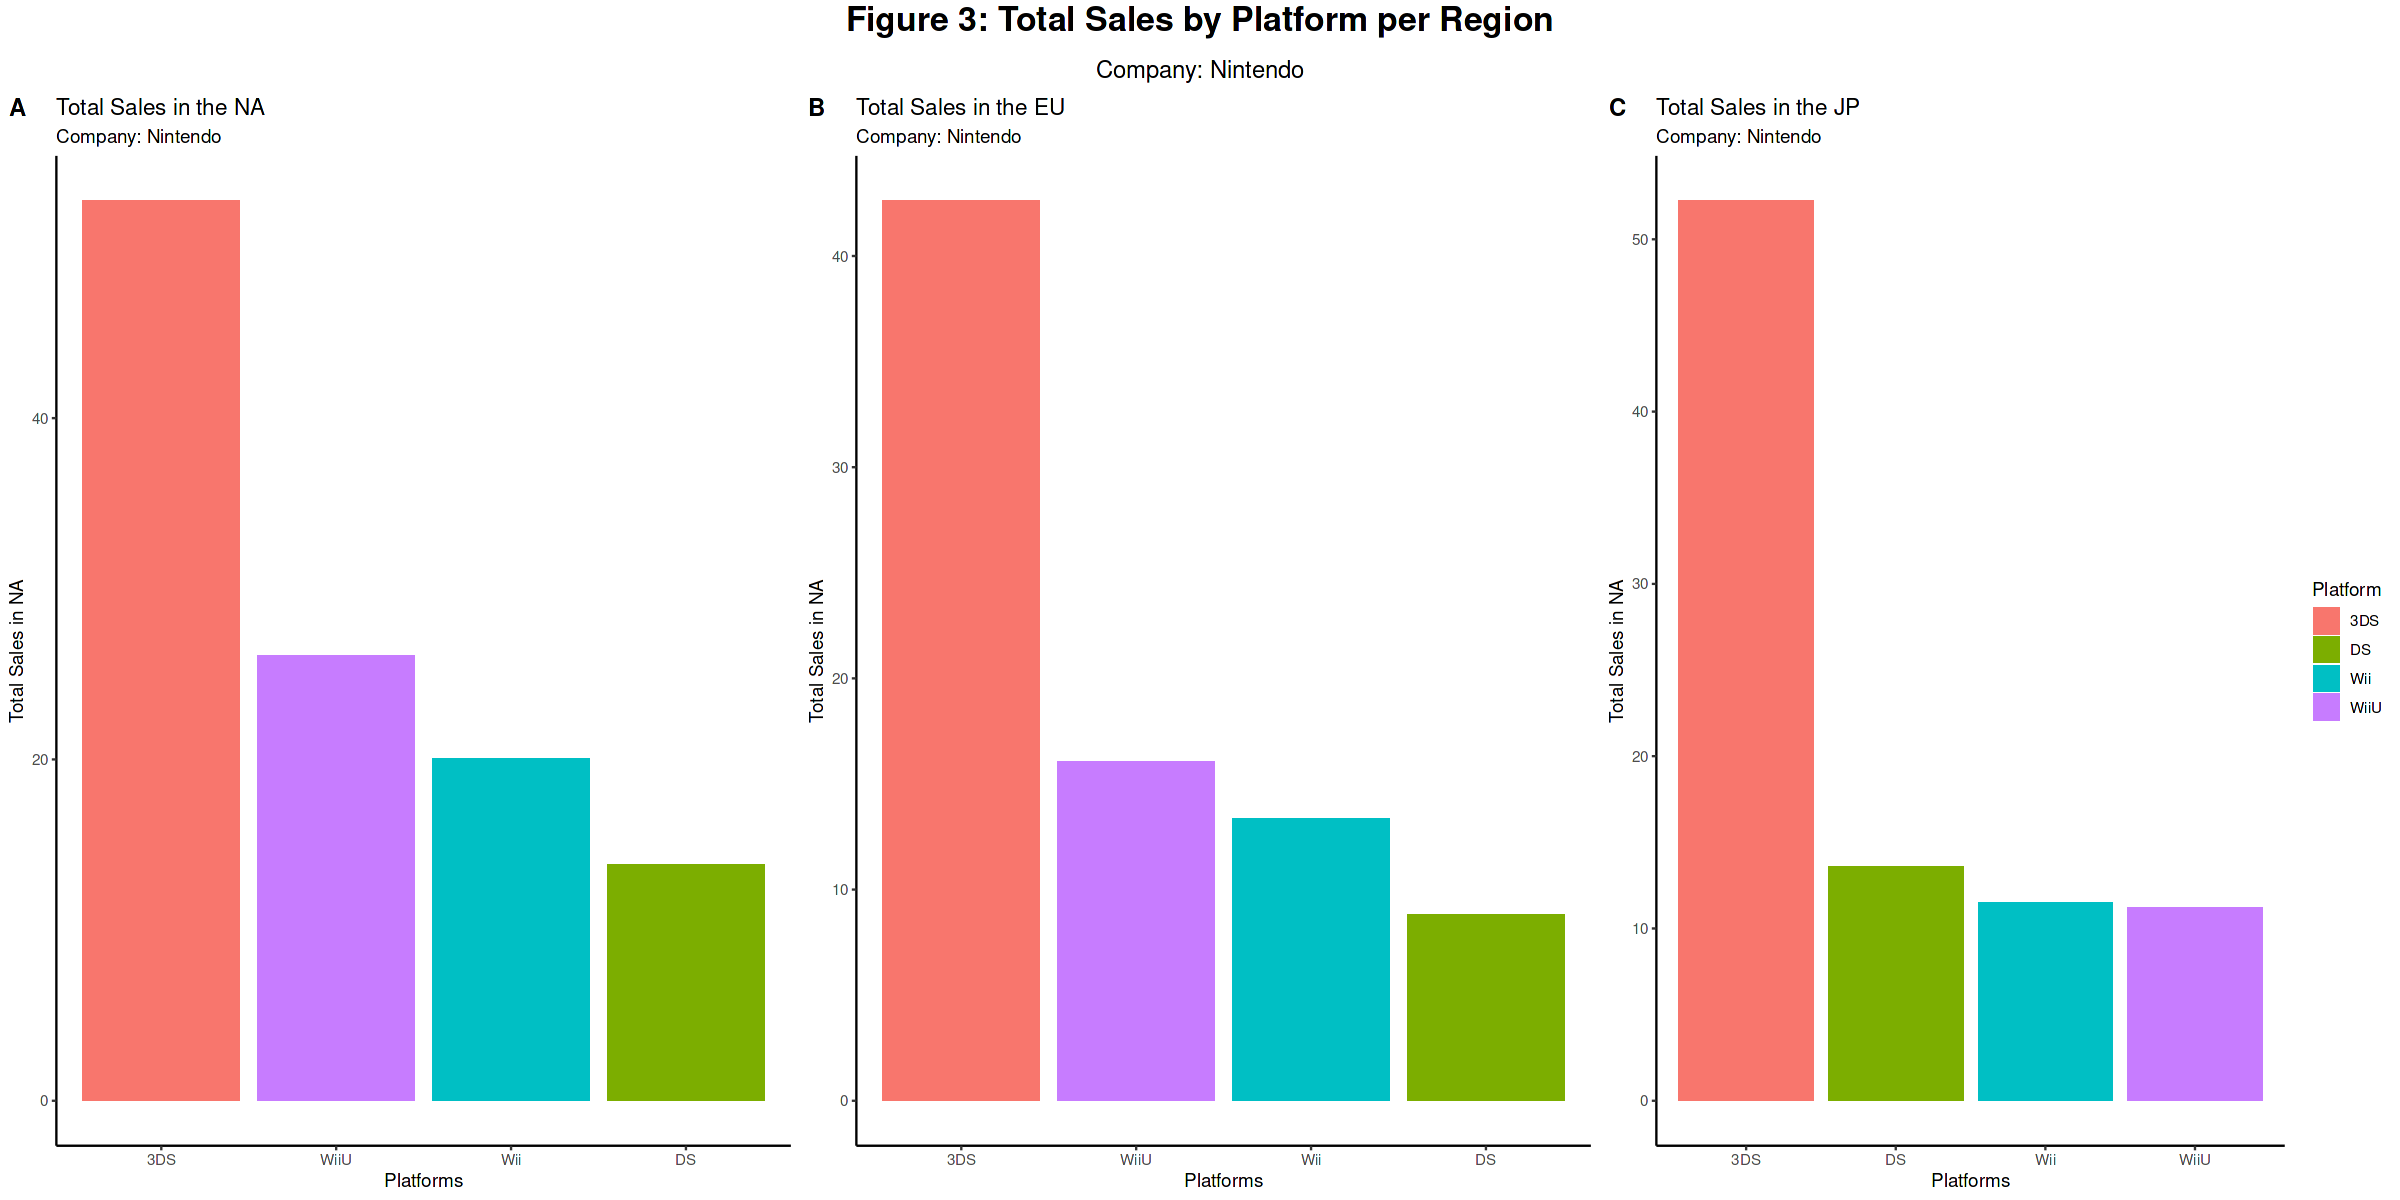

In [6]:
set_plot_dimensions <- function(width_choice, height_choice) {
options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}
set_plot_dimensions(20,10)

# data_platform: data between 2010-2016 groupedby Platform
data_platform <- data_raw %>% filter(Year >= '2010' && Year <= '2016') %>% group_by(Platform) %>% summarise(sum_NA_sales = sum(NA_Sales, na.rm = TRUE), sum_EU_sales = sum(EU_Sales, na.rm = TRUE), sum_JP_sales = sum(JP_Sales, na.rm = TRUE), sum_GL_sales = sum(Global_Sales, na.rm = TRUE))

plot3a <- data_platform %>% ggplot(mapping = aes(x = reorder(Platform, -sum_NA_sales), y =sum_NA_sales, fill = Platform)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Platforms') + labs(title = 'Total Sales in the NA', subtitle = 'Company: Nintendo')  + theme_classic() + theme(legend.position='none')
plot3b <- data_platform %>% ggplot(mapping = aes(x = reorder(Platform, -sum_EU_sales), y =sum_EU_sales, fill = Platform)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Platforms') + labs(title = 'Total Sales in the EU', subtitle = 'Company: Nintendo') + theme_classic() + theme(legend.position='none')
plot3c <- data_platform %>% ggplot(mapping = aes(x =reorder(Platform, -sum_JP_sales), y =sum_JP_sales, fill = Platform)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Platforms') + labs(title = 'Total Sales in the JP', subtitle = 'Company: Nintendo') + theme_classic()

plot3all <- ggarrange(plot3a, plot3b, plot3c,
         ncol = 3, nrow = 1,
         widths = 1, labels = c('A', 'B', 'C'))
title <-  expression(atop(bold("Figure 3: Total Sales by Platform per Region"), scriptstyle("Company: Nintendo")))
annotate_figure(plot3all, top = text_grob(title, size =20))

From the years **2010 - 2016** we see a clear distinction in the total sales between the platforms. **3DS** seems to be the most popular platform for Nintendo during this year.

# What Were the Most Popular Games

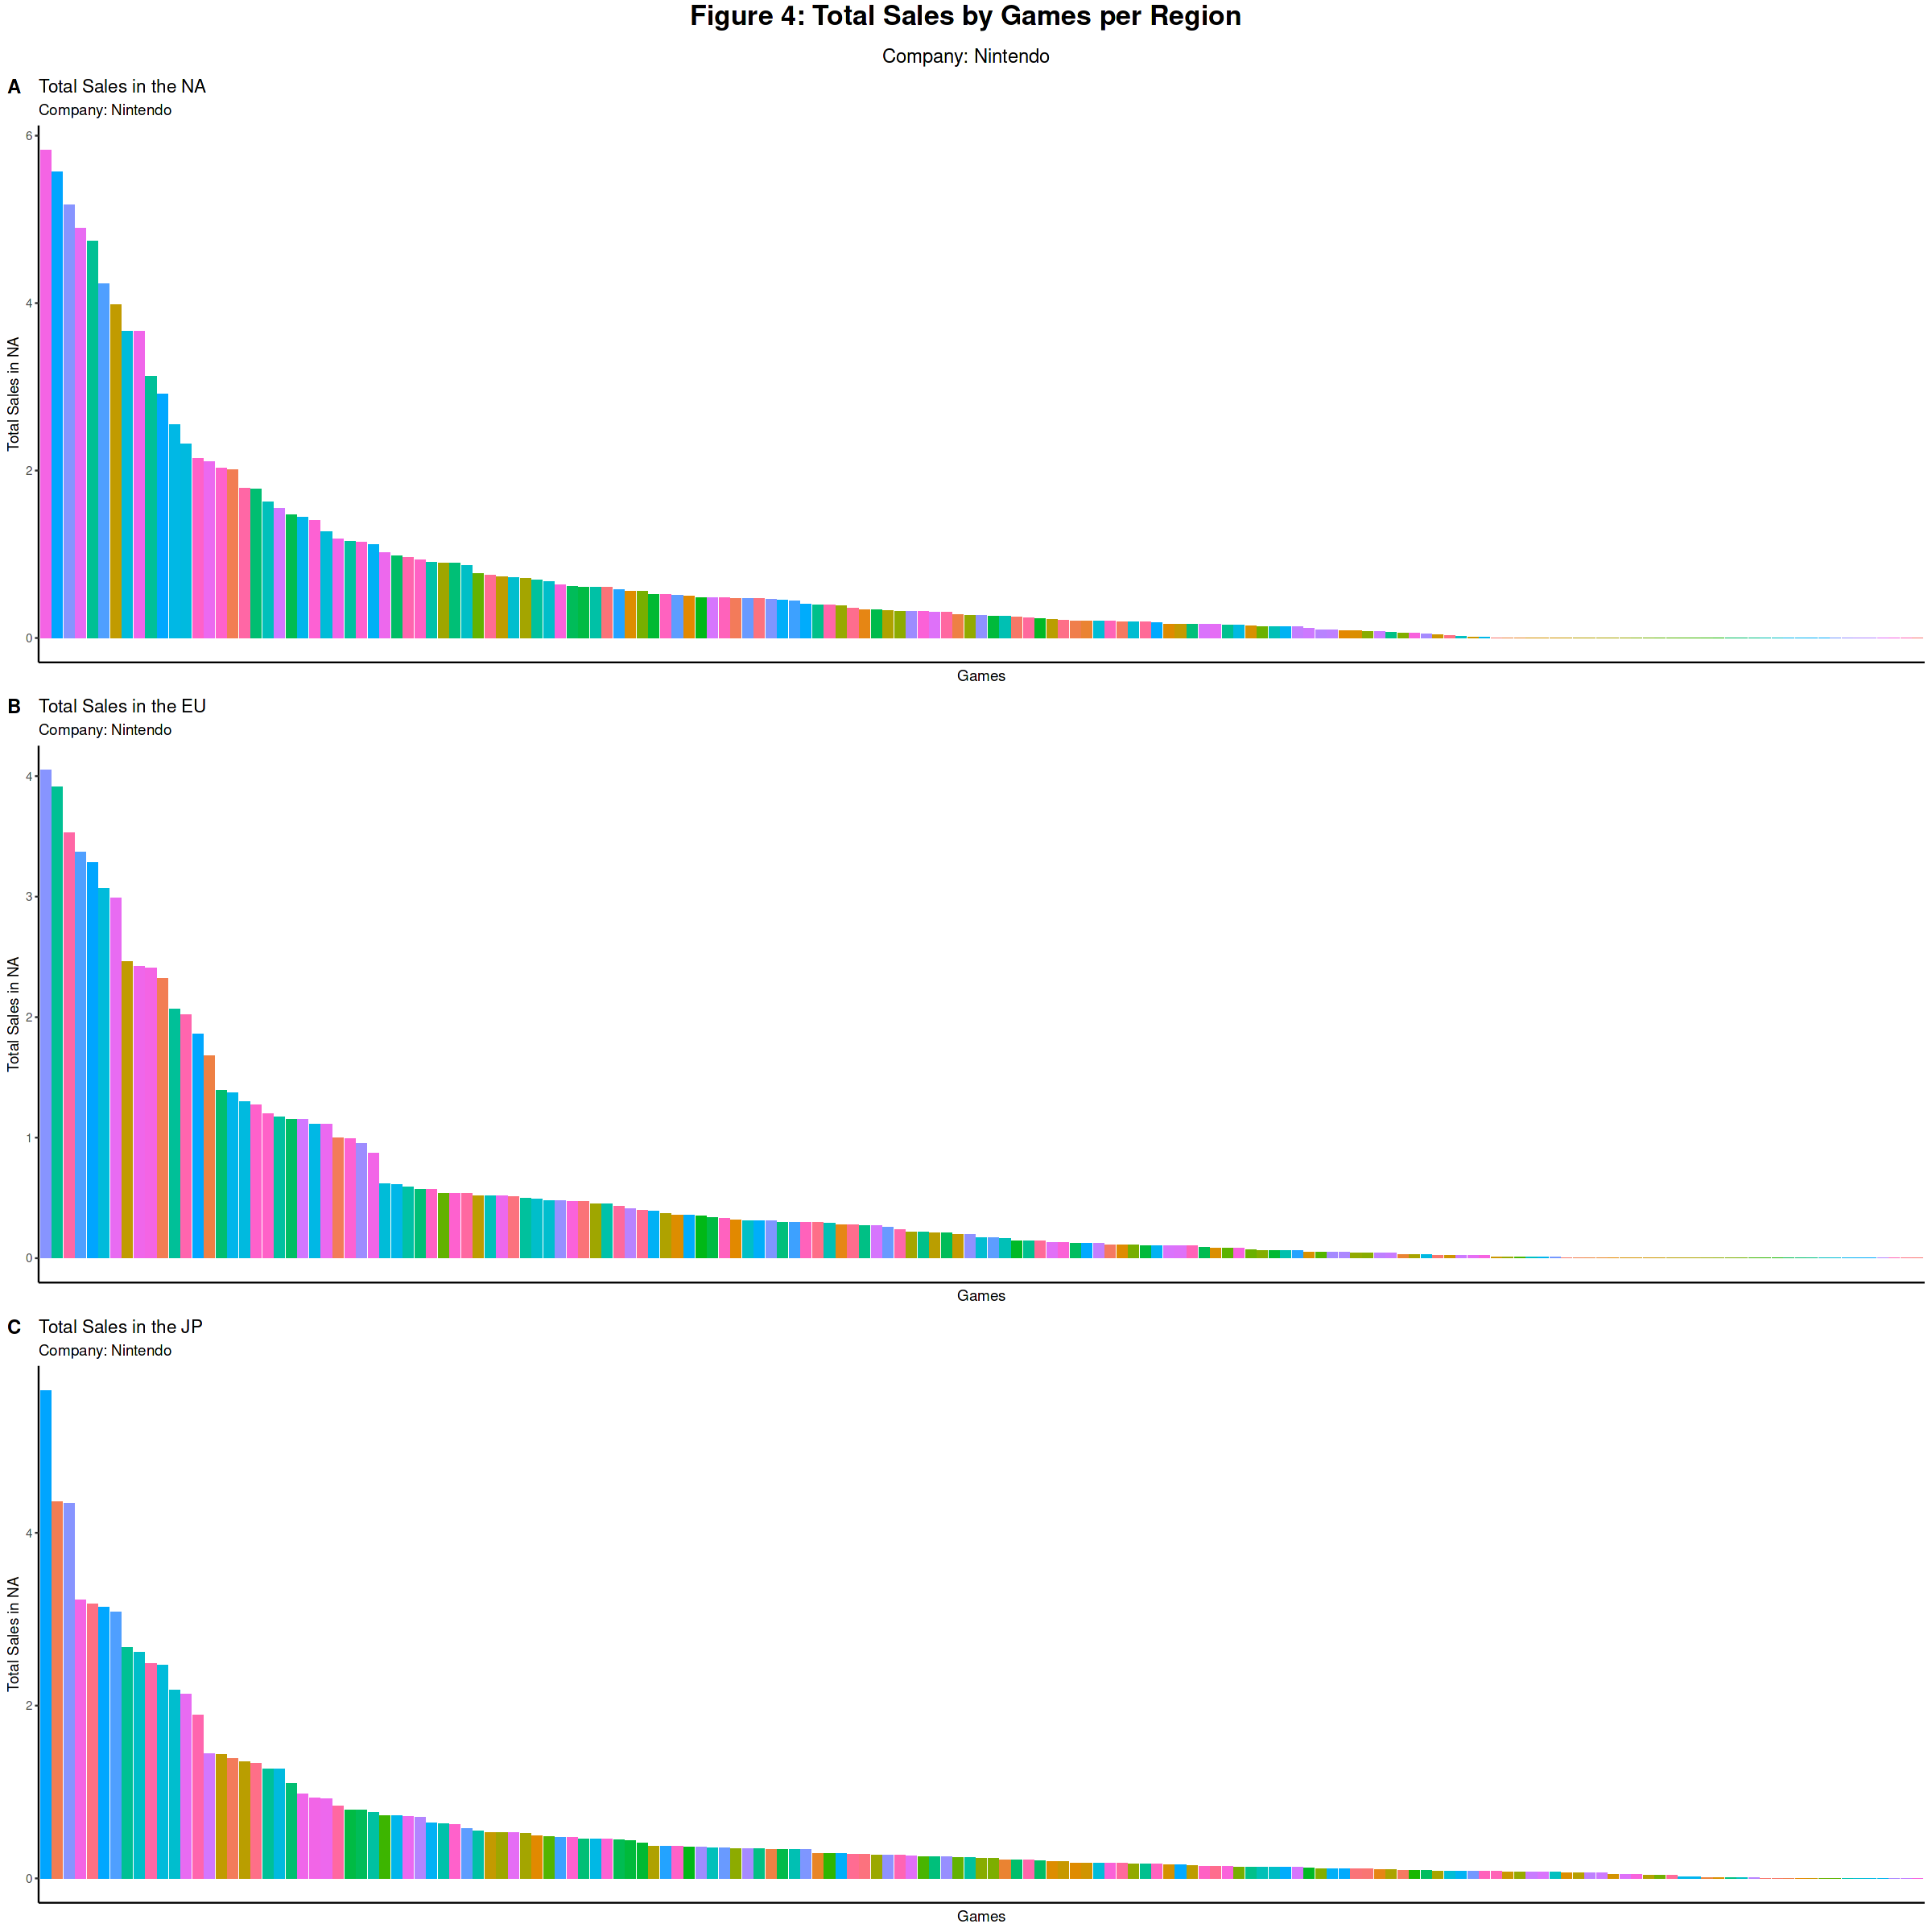

In [7]:
set_plot_dimensions <- function(width_choice, height_choice) {
options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}
set_plot_dimensions(20,20)


data_games <- data_raw %>% group_by(Name) %>% summarise(sum_NA_sales = sum(NA_Sales, na.rm = TRUE), sum_EU_sales = sum(EU_Sales, na.rm = TRUE), sum_JP_sales = sum(JP_Sales, na.rm = TRUE), sum_GL_sales = sum(Global_Sales, na.rm = TRUE))

plot4a <- data_games %>% ggplot(mapping = aes(x = reorder(Name, -sum_NA_sales), y =sum_NA_sales, fill = Name)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Games') + labs(title = 'Total Sales in the NA', subtitle = 'Company: Nintendo')  + theme_classic() + theme(legend.position='none', axis.text.x = element_blank() ,axis.ticks.x = element_blank())
plot4b <- data_games %>% ggplot(mapping = aes(x = reorder(Name, -sum_EU_sales), y =sum_EU_sales, fill = Name)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Games') + labs(title = 'Total Sales in the EU', subtitle = 'Company: Nintendo') + theme_classic() + theme(legend.position='none', axis.text.x = element_blank() ,axis.ticks.x = element_blank())
plot4c <- data_games %>% ggplot(mapping = aes(x =reorder(Name, -sum_JP_sales), y =sum_JP_sales, fill = Name)) + geom_bar(stat = 'identity') + ylab('Total Sales in NA') + xlab('Games') + labs(title = 'Total Sales in the JP', subtitle = 'Company: Nintendo') + theme_classic() + theme(legend.position='none', axis.text.x = element_blank() ,axis.ticks.x = element_blank())

plot4all <- ggarrange(plot4a, plot4b, plot4c,
         ncol = 1, nrow = 3,
         widths = 1, labels = c('A', 'B', 'C'))
title <-  expression(atop(bold("Figure 4: Total Sales by Games per Region"), scriptstyle("Company: Nintendo")))
annotate_figure(plot4all, top = text_grob(title, size =20))

Selecting by sum_NA_sales
Selecting by sum_EU_sales
Selecting by sum_JP_sales


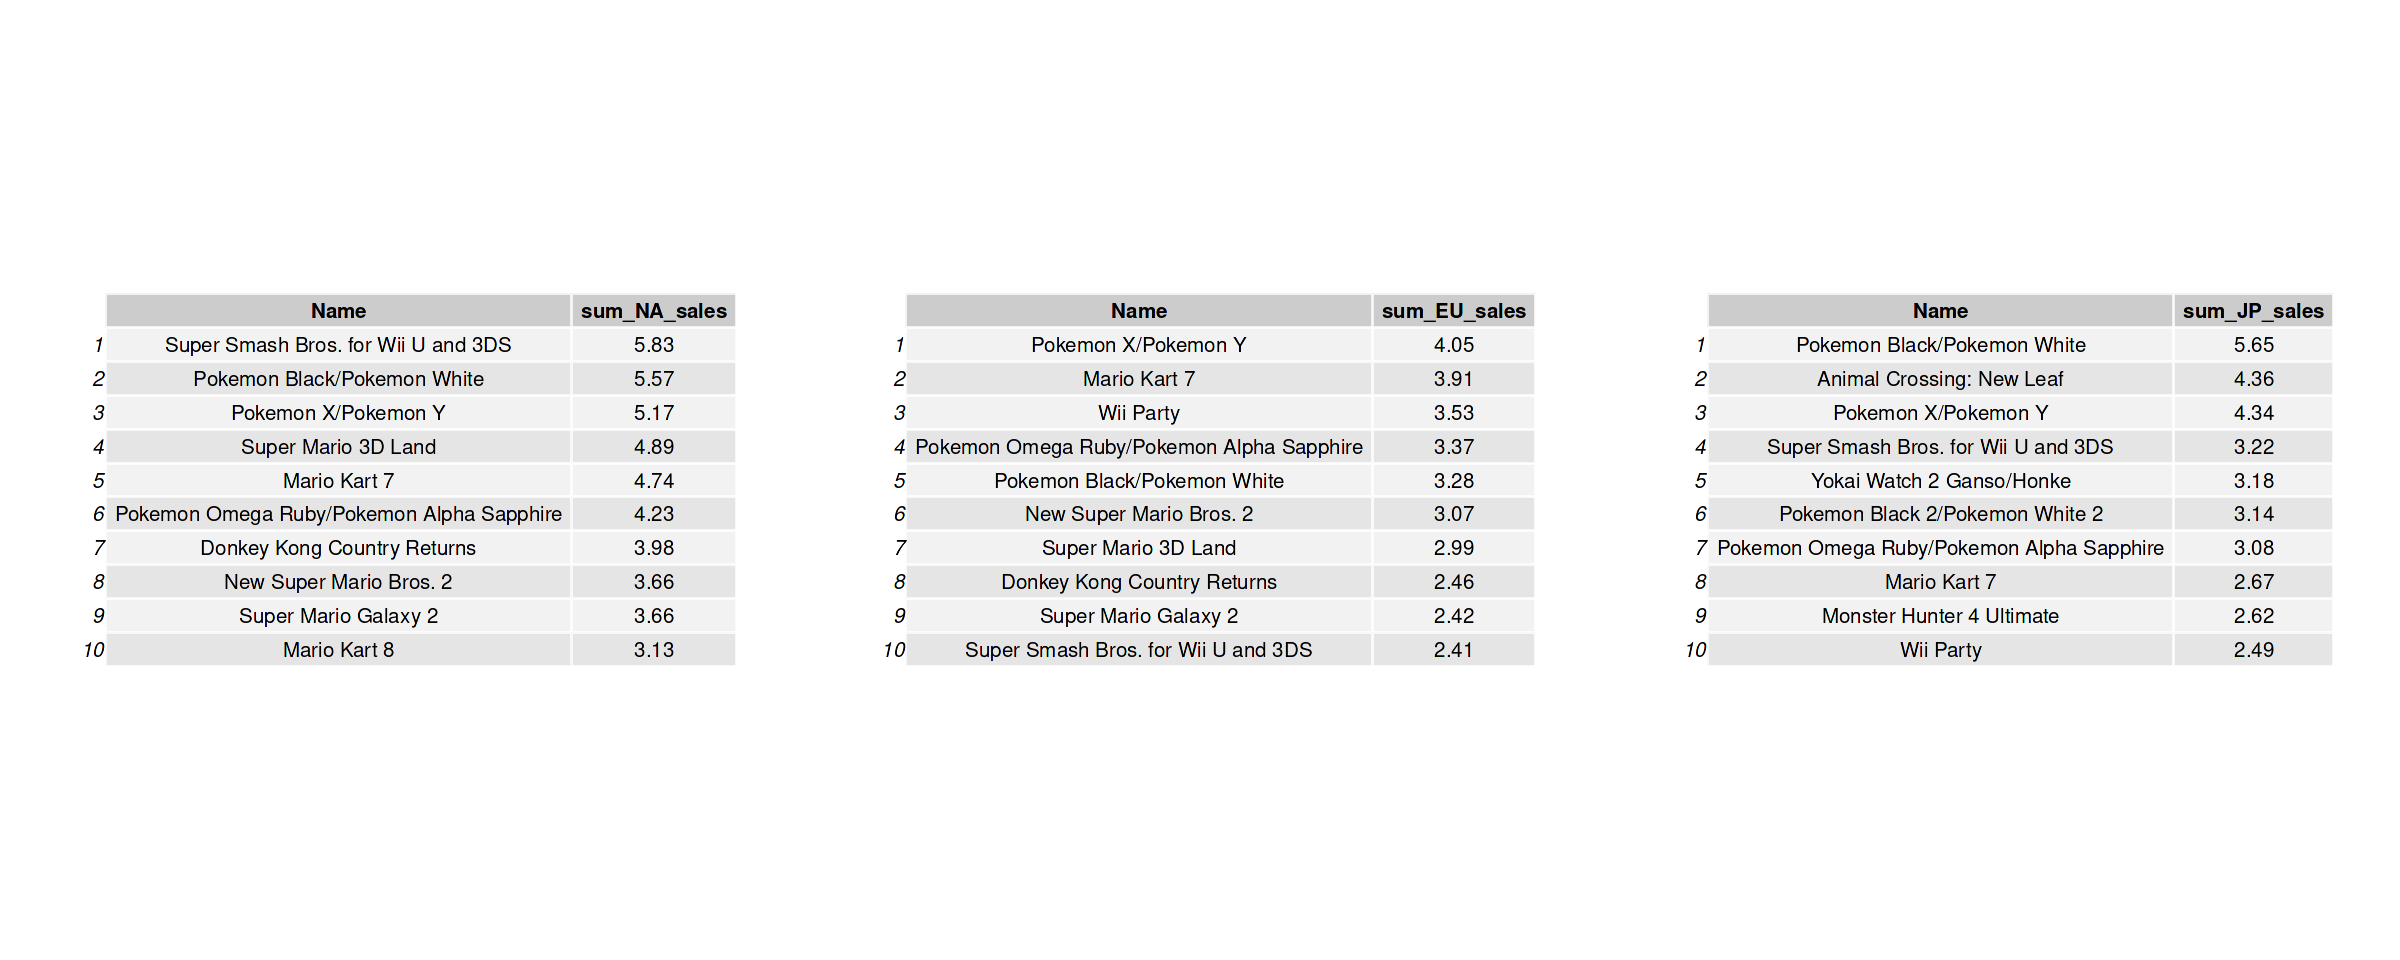

In [8]:
set_plot_dimensions <- function(width_choice, height_choice) {
options(repr.plot.width=width_choice, repr.plot.height=height_choice)
}
set_plot_dimensions(20,8)

NA_games1 <- data_games %>% select(Name, sum_NA_sales) %>% top_n(10) %>% arrange(desc(sum_NA_sales))
EU_games1 <- data_games %>% select(Name, sum_EU_sales) %>% top_n(10) %>% arrange(desc(sum_EU_sales))
JP_games1 <- data_games %>% select(Name, sum_JP_sales) %>% top_n(10) %>% arrange(desc(sum_JP_sales))  

NA_games <- tableGrob(NA_games1)
EU_games <- tableGrob(EU_games1)
JP_games <- tableGrob(JP_games1)

grid.arrange(NA_games,
             EU_games,
             JP_games,
             nrow = 1,
             newpage = FALSE
)

The most popular games for each of the region was: **Super Smash Bros** for NA **Pokemon X/Pokemon Y** for EU and **Pokemon Black/Pokemon White** for JP

# Conclusion and Next Steps

To summarize:
1. Figure 1. shows that the most popular genre for Nintendo during 2010-2016 was platform based for NA, and role-playing for EU and JP. 
2. Figure 2. shows the popularity between the regions were strongly correlated meaning the marketing can be possibly projected using information from one of the regions
3. figure 3. shows that out of all the platforms, the 3DS had the highest sales throughout all regions during that time.
4. Figure 4. shows that although the genre and platforms are similar in all the regions, the specific games that were most popular differed between the regions.

Next Steps:
Although this data is quite outdated, we can use these analyses to understand how the consumers react to new platforms/genres that Nintendo might release. 

Future Projects:
The next steps include looking at data from other companies and seeing if the genre/platform similarity exists between the regions as well.